In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./OnlineRetailClean.csv')
df

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int64  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float64
 7   CustomerID     397884 non-null  int64  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 30.4+ MB


In [10]:
# 안쓸 행 정리

df = df.drop(['Unnamed: 0', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'Country'], axis = 1)
df

,InvoiceNo,InvoiceDate,CustomerID,CheckoutPrice
0,536365,12/1/2010 8:26,17850,15.30
1,536365,12/1/2010 8:26,17850,20.34
2,536365,12/1/2010 8:26,17850,22.00
3,536365,12/1/2010 8:26,17850,20.34
4,536365,12/1/2010 8:26,17850,20.34
...,...,...,...,...
397879,581587,12/9/2011 12:50,12680,10.20
397880,581587,12/9/2011 12:50,12680,12.60
397881,581587,12/9/2011 12:50,12680,16.60
397882,581587,12/9/2011 12:50,12680,16.60


In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format = True)
df

,InvoiceNo,InvoiceDate,CustomerID,CheckoutPrice
0,536365,2010-12-01 08:26:00,17850,15.30
1,536365,2010-12-01 08:26:00,17850,20.34
2,536365,2010-12-01 08:26:00,17850,22.00
3,536365,2010-12-01 08:26:00,17850,20.34
4,536365,2010-12-01 08:26:00,17850,20.34
...,...,...,...,...
397879,581587,2011-12-09 12:50:00,12680,10.20
397880,581587,2011-12-09 12:50:00,12680,12.60
397881,581587,2011-12-09 12:50:00,12680,16.60
397882,581587,2011-12-09 12:50:00,12680,16.60


In [15]:
# 구매 날짜 정리하기

def get_month(date):
    return datetime(date.year, date.month, 1)

In [16]:
df['Month'] = df['InvoiceDate'].apply(get_month)
df

,InvoiceNo,InvoiceDate,CustomerID,CheckoutPrice,Month
0,536365,2010-12-01 08:26:00,17850,15.30,2010-12-01
1,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01
2,536365,2010-12-01 08:26:00,17850,22.00,2010-12-01
3,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01
4,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01
...,...,...,...,...,...
397879,581587,2011-12-09 12:50:00,12680,10.20,2011-12-01
397880,581587,2011-12-09 12:50:00,12680,12.60,2011-12-01
397881,581587,2011-12-09 12:50:00,12680,16.60,2011-12-01
397882,581587,2011-12-09 12:50:00,12680,16.60,2011-12-01


In [18]:
# 고객별 최초 구매 월 찾기위해 고객별로 월 묶기
month_group = df.groupby('CustomerID')['Month']

# 최초 구매 월 컬럼 추가
df['Month_started'] = month_group.transform(np.min)
df

,InvoiceNo,InvoiceDate,CustomerID,CheckoutPrice,Month,Month_started
0,536365,2010-12-01 08:26:00,17850,15.30,2010-12-01,2010-12-01
1,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01
2,536365,2010-12-01 08:26:00,17850,22.00,2010-12-01,2010-12-01
3,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01
4,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01
...,...,...,...,...,...,...
397879,581587,2011-12-09 12:50:00,12680,10.20,2011-12-01,2011-08-01
397880,581587,2011-12-09 12:50:00,12680,12.60,2011-12-01,2011-08-01
397881,581587,2011-12-09 12:50:00,12680,16.60,2011-12-01,2011-08-01
397882,581587,2011-12-09 12:50:00,12680,16.60,2011-12-01,2011-08-01


In [22]:
# 고객의 최초 구매월부터 각 구매날짜까지 몇달 지났는지 계산
# 각 년도 빼주고 *12(월로 계산할거니까)한 값과 각 월 뺀 값 더하기

df['Month_passed'] = (df['Month'].dt.year - df['Month_started'].dt.year) * 12 + (df['Month'].dt.month - df['Month_started'].dt.month)
df

,InvoiceNo,InvoiceDate,CustomerID,CheckoutPrice,Month,Month_started,Month_passed
0,536365,2010-12-01 08:26:00,17850,15.30,2010-12-01,2010-12-01,0
1,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
2,536365,2010-12-01 08:26:00,17850,22.00,2010-12-01,2010-12-01,0
3,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
4,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...
397879,581587,2011-12-09 12:50:00,12680,10.20,2011-12-01,2011-08-01,4
397880,581587,2011-12-09 12:50:00,12680,12.60,2011-12-01,2011-08-01,4
397881,581587,2011-12-09 12:50:00,12680,16.60,2011-12-01,2011-08-01,4
397882,581587,2011-12-09 12:50:00,12680,16.60,2011-12-01,2011-08-01,4


In [42]:
# Month_started와 Month_passed별로 고객 수 카운팅

grouped = df.groupby(['Month_started', 'Month_passed'])
cohort_df = pd.DataFrame(grouped['CustomerID'].nunique())
cohort_df

CustomerID
Month_started Month_passed            
2010-12-01    0                    885
              1                    324
              2                    286
              3                    340
              4                    321
...                                ...
2011-10-01    1                     86
              2                     41
2011-11-01    0                    323
              1                     36
2011-12-01    0                     41

[91 rows x 1 columns]

In [43]:
# 시각화를 위해 형태 조정

cohort_df = cohort_df.reset_index()
cohort_df

,Month_started,Month_passed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,323
89,2011-11-01,1,36


In [44]:
cohort_df = cohort_df.pivot(index = 'Month_started', columns = 'Month_passed')
cohort_df

CustomerID                                                   \
Month_passed          0      1      2      3      4      5      6      7    
Month_started                                                               
2010-12-01         885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01         417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01         380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01         452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01         300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01         284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01         242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01         188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01         169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01         299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01         358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01         323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01          41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                  
Month_passed      8      9      10     11     12  
Month_started                                     
2010-12-01     313.0  350.0  331.0  445.0  235.0  
2011-01-01     125.0  136.0  152.0   49.0    NaN  
2011-02-01      94.0  116.0   26.0    NaN    NaN  
2011-03-01     126.0   39.0    NaN    NaN    NaN  
2011-04-01      22.0    NaN    NaN    NaN    NaN  
2011-05-01       NaN    NaN    NaN    NaN    NaN  
2011-06-01       NaN    NaN    NaN    NaN    NaN  
2011-07-01       NaN    NaN    NaN    NaN    NaN  
2011-08-01       NaN    NaN    NaN    NaN    NaN  
2011-09-01       NaN    NaN    NaN    NaN    NaN  
2011-10-01       NaN    NaN    NaN    NaN    NaN  
2011-11-01       NaN    NaN    NaN    NaN    NaN  
2011-12-01       NaN    NaN    NaN    NaN    NaN

In [45]:
# 단순 집계를 퍼센트로 바꿔주기
# cohort_df.iloc[:, 0]
cohort_customer = cohort_df.divide(cohort_df.iloc[:, 0],axis = 0) * 100
cohort_customer

CustomerID                                              \
Month_passed          0          1          2          3          4    
Month_started                                                          
2010-12-01         100.0  36.610169  32.316384  38.418079  36.271186   
2011-01-01         100.0  22.062350  26.618705  23.021583  32.134293   
2011-02-01         100.0  18.684211  18.684211  28.421053  27.105263   
2011-03-01         100.0  15.044248  25.221239  19.911504  22.345133   
2011-04-01         100.0  21.333333  20.333333  21.000000  19.666667   
2011-05-01         100.0  19.014085  17.253521  17.253521  20.774648   
2011-06-01         100.0  17.355372  15.702479  26.446281  23.140496   
2011-07-01         100.0  18.085106  20.744681  22.340426  27.127660   
2011-08-01         100.0  20.710059  24.852071  24.260355  12.426036   
2011-09-01         100.0  23.411371  30.100334  11.371237        NaN   
2011-10-01         100.0  24.022346  11.452514        NaN        NaN   
2011-11-01         100.0  11.145511        NaN        NaN        NaN   
2011-12-01         100.0        NaN        NaN        NaN        NaN   

                                                                      \
Month_passed          5          6          7          8          9    
Month_started                                                          
2010-12-01     39.774011  36.271186  34.915254  35.367232  39.548023   
2011-01-01     28.776978  24.700240  24.220624  29.976019  32.613909   
2011-02-01     24.736842  25.263158  27.894737  24.736842  30.526316   
2011-03-01     16.814159  26.769912  23.008850  27.876106   8.628319   
2011-04-01     22.666667  21.666667  26.000000   7.333333        NaN   
2011-05-01     23.239437  26.408451   9.507042        NaN        NaN   
2011-06-01     33.471074   9.504132        NaN        NaN        NaN   
2011-07-01     11.170213        NaN        NaN        NaN        NaN   
2011-08-01           NaN        NaN        NaN        NaN        NaN   
2011-09-01           NaN        NaN        NaN        NaN        NaN   
2011-10-01           NaN        NaN        NaN        NaN        NaN   
2011-11-01           NaN        NaN        NaN        NaN        NaN   
2011-12-01           NaN        NaN        NaN        NaN        NaN   

                                                
Month_passed          10         11         12  
Month_started                                   
2010-12-01     37.401130  50.282486  26.553672  
2011-01-01     36.450839  11.750600        NaN  
2011-02-01      6.842105        NaN        NaN  
2011-03-01           NaN        NaN        NaN  
2011-04-01           NaN        NaN        NaN  
2011-05-01           NaN        NaN        NaN  
2011-06-01           NaN        NaN        NaN  
2011-07-01           NaN        NaN        NaN  
2011-08-01           NaN        NaN        NaN  
2011-09-01           NaN        NaN        NaN  
2011-10-01           NaN        NaN        NaN  
2011-11-01           NaN        NaN        NaN  
2011-12-01           NaN        NaN        NaN

In [46]:
cohort_customer = cohort_customer.round(decimals = 2)
cohort_customer

CustomerID                                                   \
Month_passed          0      1      2      3      4      5      6      7    
Month_started                                                               
2010-12-01         100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01         100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01         100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01         100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01         100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01         100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01         100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01         100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01         100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01         100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01         100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01         100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                  
Month_passed      8      9      10     11     12  
Month_started                                     
2010-12-01     35.37  39.55  37.40  50.28  26.55  
2011-01-01     29.98  32.61  36.45  11.75    NaN  
2011-02-01     24.74  30.53   6.84    NaN    NaN  
2011-03-01     27.88   8.63    NaN    NaN    NaN  
2011-04-01      7.33    NaN    NaN    NaN    NaN  
2011-05-01       NaN    NaN    NaN    NaN    NaN  
2011-06-01       NaN    NaN    NaN    NaN    NaN  
2011-07-01       NaN    NaN    NaN    NaN    NaN  
2011-08-01       NaN    NaN    NaN    NaN    NaN  
2011-09-01       NaN    NaN    NaN    NaN    NaN  
2011-10-01       NaN    NaN    NaN    NaN    NaN  
2011-11-01       NaN    NaN    NaN    NaN    NaN  
2011-12-01       NaN    NaN    NaN    NaN    NaN

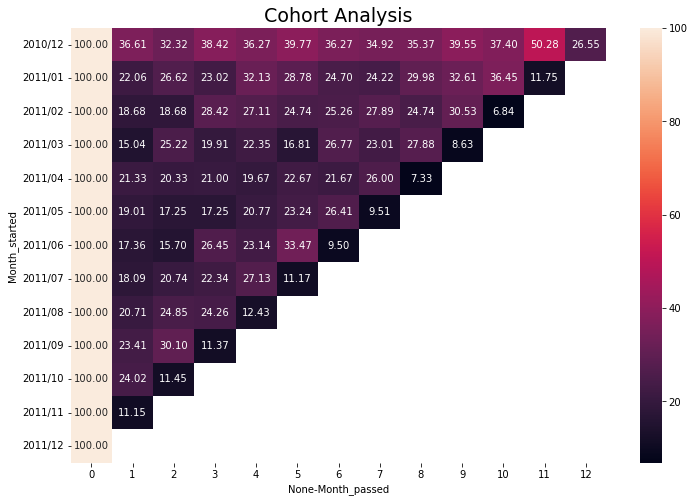

In [49]:
# heatmap 시각화

xticks = np.arange(0, 13)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11', '2011/12']

plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(cohort_customer, annot=True, 
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.2f')
plt.show()